<h2>Load the data </h2>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('html',False)

In [2]:
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number

# Enable inline plotting
%matplotlib inline

train_x = '/home/hessenh/Development/Prosjektoppgave/Notebook/K-Nearest-Neighbors-with-Dynamic-Time-Warping-master/data/UCI-HAR-Dataset/train/Inertial Signals/body_acc_x_train.txt'
train_y = '/home/hessenh/Development/Prosjektoppgave/Notebook/K-Nearest-Neighbors-with-Dynamic-Time-Warping-master/data/UCI-HAR-Dataset/train/Inertial Signals/body_acc_y_train.txt'
train_z = '/home/hessenh/Development/Prosjektoppgave/Notebook/K-Nearest-Neighbors-with-Dynamic-Time-Warping-master/data/UCI-HAR-Dataset/train/Inertial Signals/body_acc_z_train.txt'
train_l = '/home/hessenh/Development/Prosjektoppgave/Notebook/K-Nearest-Neighbors-with-Dynamic-Time-Warping-master/data/UCI-HAR-Dataset/train/y_train.txt'

df_x = pd.read_csv(train_x, header=None, sep='\s+')
df_y = pd.read_csv(train_y, header=None, sep='\s+')
df_z = pd.read_csv(train_z, header=None, sep='\s+')
df_l = pd.read_csv(train_l, header=None, sep='\s+')

<h3>Data description</h3>
<p>1 WALKING</p>
<p>2 WALKING_UPSTAIRS</p>
<p>3 WALKING_DOWNSTAIRS</p>
<p>4 SITTING</p>
<p>5 STANDING</p>
<p>6 LAYING</p>

<h3> From standing(instance 23) to sitting(instance 32).</h3>

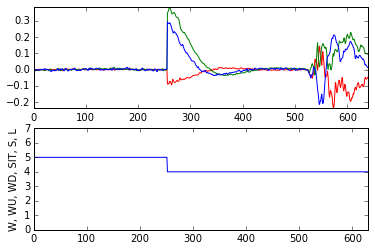

In [3]:
#Since the data we have is already overlapping with 50%, we have to split this up. 
df_x = df_x.ix[:,0:63]

start_instance = 23
stop_instance = 33

def plotRawDataBetweenInstances(start, stop, df_x, df_y, df_z):    
    df_x_list = []
    df_y_list = []
    df_z_list = []
    
    for i in range(start,stop):
        for j in range(0,len(df_x.iloc[i].values)):
            df_x_list.append(df_x.iloc[i].values[j])
            df_y_list.append(df_y.iloc[i].values[j])
            df_z_list.append(df_z.iloc[i].values[j])

    plt.subplot(2,1,1)
    plt.plot(range(len(df_x_list)), df_x_list, c="r")
    plt.plot(range(len(df_y_list)), df_y_list, c="g")
    plt.plot(range(len(df_z_list)), df_z_list, c="b")
    
    min_y = min([min(df_x_list),min(df_y_list),min(df_z_list)])
    max_y = max([max(df_x_list),max(df_y_list),max(df_z_list)])
    
    plt.axis([0, len(df_x_list), min_y,max_y])
    
    
    df_l_list = []
    for i in range(start, stop):
        for j in range(0,63):
            df_l_list.append(df_l.iloc[i])
        
        
    
    plt.subplot(2,1,2)
    plt.plot(range(len(df_l_list)), df_l_list)
    plt.axis([0, len(df_l_list), 0,7])
    plt.ylabel('W, WU, WD, SIT, S, L')
    
    plt.show()
    
plotRawDataBetweenInstances(start_instance, stop_instance, df_x, df_y, df_z) 

<h3> From standing(instance 374) to sitting(instance 383).</h3>

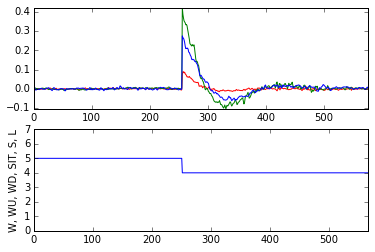

In [4]:
plotRawDataBetweenInstances(374, 383, df_x, df_y, df_z) 

<h3> From standing(instance 548) to sitting(instance 557).</h3>

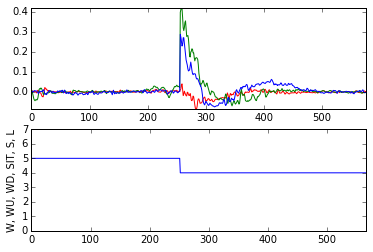

In [5]:
plotRawDataBetweenInstances(548, 557, df_x, df_y, df_z) 

<h3> From sitting(instance 47) to laying(instance 56).</h3>

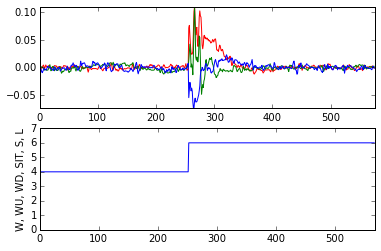

In [6]:
plotRawDataBetweenInstances(47, 56, df_x, df_y, df_z) 

<h3> From sitting(instance 209) to laying(instance 218).</h3>

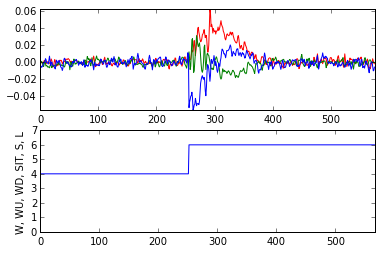

In [7]:
plotRawDataBetweenInstances(209, 218, df_x, df_y, df_z) 

<h3> From sitting(instance 233) to laying(instance 242).</h3>

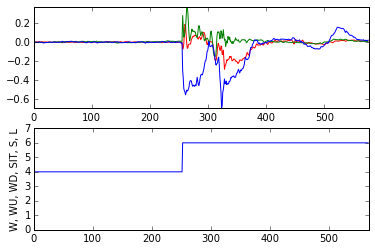

In [8]:
plotRawDataBetweenInstances(233, 242, df_x, df_y, df_z) 

<h3> From laying(instance 74) to walking(instance 83).</h3>

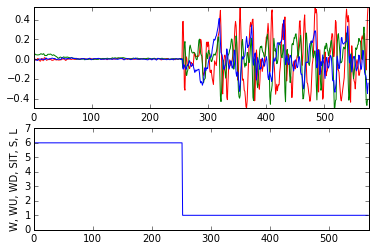

In [9]:
plotRawDataBetweenInstances(74, 83, df_x, df_y, df_z) 

<h3> From laying(instance 244) to walking(instance 253).</h3>

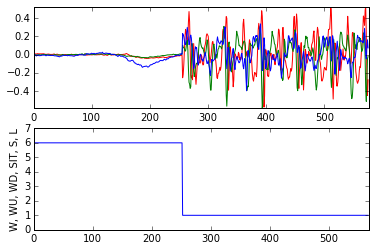

In [10]:
plotRawDataBetweenInstances(244, 253, df_x, df_y, df_z) 

<h3> From laying(instance 430) to walking(instance 439).</h3>

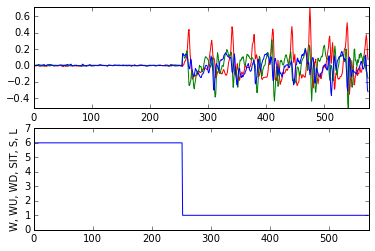

In [11]:
plotRawDataBetweenInstances(430, 439, df_x, df_y, df_z) 

<h3> From walking(instance 121) to walking down(instance 130).</h3>

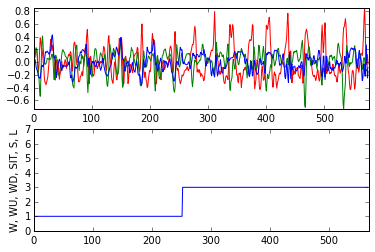

In [12]:
plotRawDataBetweenInstances(121, 130, df_x, df_y, df_z) 

<h3> From walking(instance 292) to walking down(instance 301).</h3>

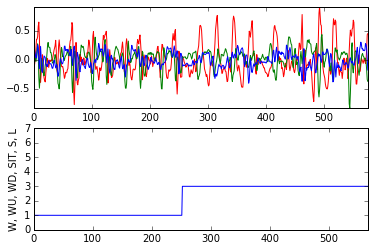

In [13]:
plotRawDataBetweenInstances(292, 301, df_x, df_y, df_z) 

<h3> From walking(instance 461) to walking down(instance 470).</h3>

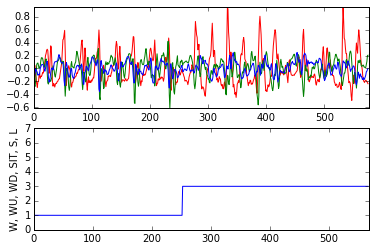

In [14]:
plotRawDataBetweenInstances(461, 470, df_x, df_y, df_z) 

<h3> From walking up(instance 326) to walking down(instance 335).</h3>

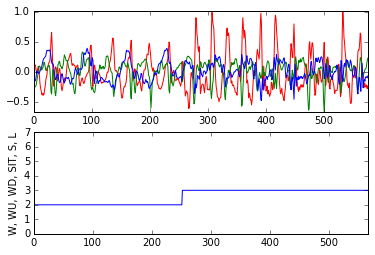

In [15]:
plotRawDataBetweenInstances(326, 335, df_x, df_y, df_z) 

<h3> From walking up(instance 326) to walking down(instance 335).</h3>

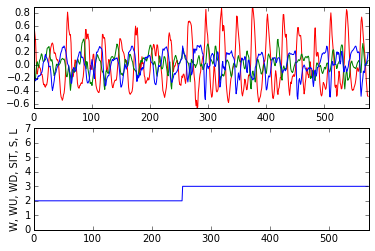

In [16]:
plotRawDataBetweenInstances(3392, 3401, df_x, df_y, df_z) 

<h3> From walking up(instance 172) to standing(instance 181).</h3>

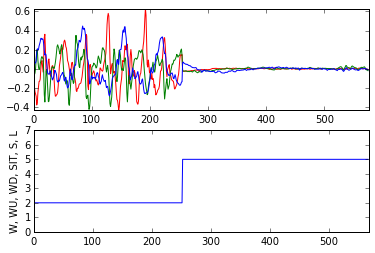

In [17]:
plotRawDataBetweenInstances(172, 181, df_x, df_y, df_z) 

<h3> From walking up(instance 518) to standing(instance 527).</h3>

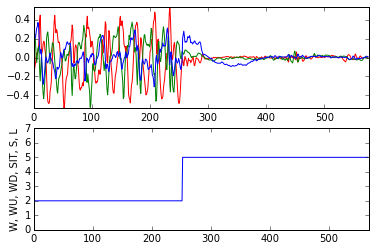

In [18]:
plotRawDataBetweenInstances(518, 527, df_x, df_y, df_z) 

<h3> From walking down(instance 146) to walking up(instance 155).</h3>

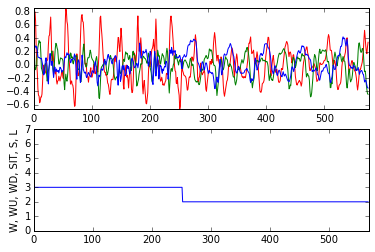

In [19]:
plotRawDataBetweenInstances(146, 155, df_x, df_y, df_z) 

<h3> From walking down(instance 299) to walking up(instance 308).</h3>

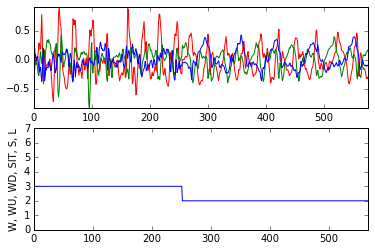

In [20]:
plotRawDataBetweenInstances(299, 308, df_x, df_y, df_z) 

<h3> From walking down(instance 343) to standing(instance 352).</h3>

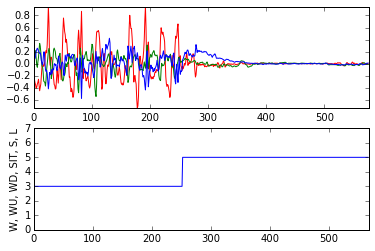

In [21]:
plotRawDataBetweenInstances(343, 352, df_x, df_y, df_z) 

<h3> From walking down(instance 3601) to standing(instance 3610).</h3>

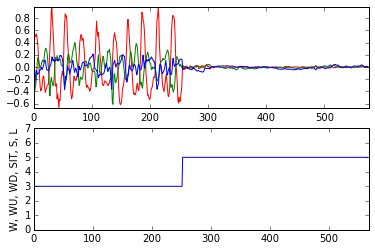

In [22]:
plotRawDataBetweenInstances(3601, 3610, df_x, df_y, df_z) 

<h3> From laying(instance 221) to sitting(instance 230).</h3>

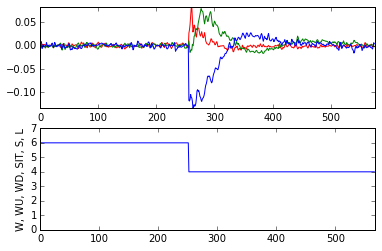

In [23]:
plotRawDataBetweenInstances(221, 230, df_x, df_y, df_z) 

<h1>Trying to do all this automagicly</h1>

In [24]:
names = ["walking", "walking up", "walking down", "sitting","standing", "lying"]



def getActivityShifts(treshold):
    combinations = []
    positions = []
    text = []
    for i in range(len(df_l)-1):
        if (df_l.iloc[i].values[0] != df_l.iloc[i+1].values[0]):
            comb = (df_l.iloc[i].values[0],df_l.iloc[i+1].values[0])

            if comb not in combinations:
                combinations.append(comb)
                pos = (i-treshold, i+treshold+1)
                positions.append(pos)
                t = names[comb[0]-1] + " to " + names[comb[1]-1]
                text.append(t)
                
    return combinations, positions, text

combinations,positions,text = getActivityShifts(5)

standing to sitting


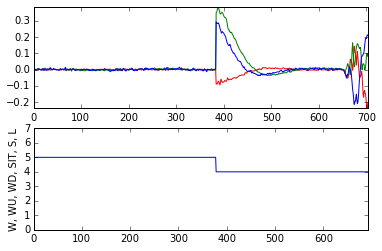

sitting to lying


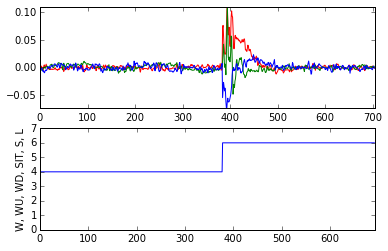

lying to walking


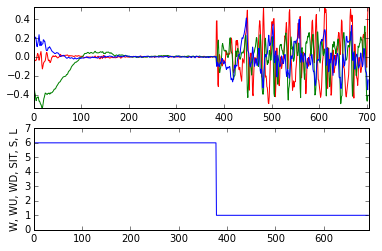

walking to walking down


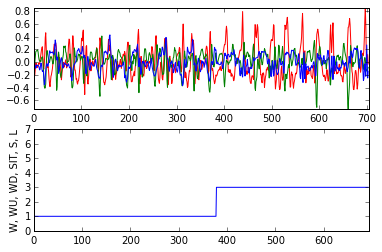

walking down to walking up


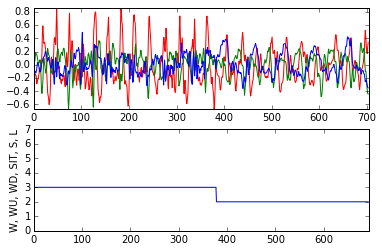

walking up to standing


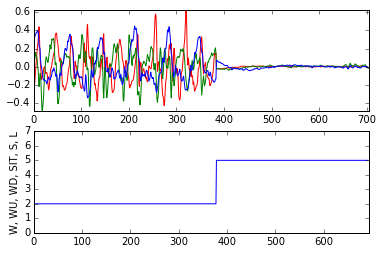

lying to sitting


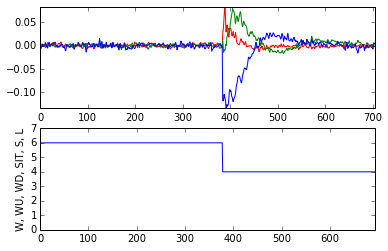

walking up to walking down


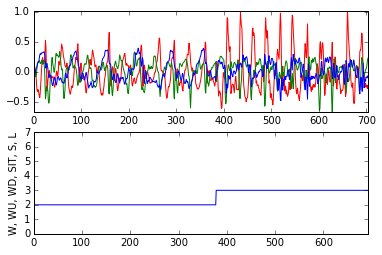

walking down to standing


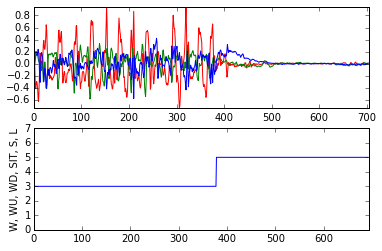

In [25]:
for i in range(len(combinations)):
    start = positions[i][0]
    stop = positions[i][1]
    print text[i]
    
    plotRawDataBetweenInstances(start, stop, df_x, df_y, df_z) 